In [3]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#loading the dataset
dataset = pd.read_csv("Dataset.csv")
dataset.head()

,CPU Total,CPU Package Temperature,Memory,Used Memory,Temperature,Used Space
0,3.528023,40,48.994663,1.918564,35,92.11886
1,5.060095,40,48.971184,1.917644,35,92.11886
2,10.937500,40,49.110200,1.923088,35,92.11886
3,5.078125,40,49.125004,1.923668,35,92.11886
4,2.343750,40,49.137670,1.924164,35,92.11886


In [5]:
#removing cpu temp from dataset
dataset.head()
dataset.dtypes
ds  = dataset.drop(columns = 'CPU Package Temperature')

In [6]:
#rain data: all columns except cpu temp
X = ds.iloc[::].values
print(X)

[[ 3.52802277 48.9946632   1.91856384 35.         92.11886   ]
 [ 5.060095   48.9711838   1.9176445  35.         92.11886   ]
 [10.9375     49.1102      1.92308807 35.         92.11886   ]
 ...
 [17.96875    54.2728844   2.12525177 42.         92.1337    ]
 [11.742425   54.24736     2.12425232 42.         92.1337    ]
 [13.7096767  54.24132     2.12401581 42.         92.1337    ]]


In [7]:
# includong only one one feature
X1=X[:,[2]]
print(X1)

[[1.91856384]
 [1.9176445 ]
 [1.92308807]
 ...
 [2.12525177]
 [2.12425232]
 [2.12401581]]


In [8]:
 data = pd.read_csv("Dataset.csv")
data.head()

,CPU Total,CPU Package Temperature,Memory,Used Memory,Temperature,Used Space
0,3.528023,40,48.994663,1.918564,35,92.11886
1,5.060095,40,48.971184,1.917644,35,92.11886
2,10.937500,40,49.110200,1.923088,35,92.11886
3,5.078125,40,49.125004,1.923668,35,92.11886
4,2.343750,40,49.137670,1.924164,35,92.11886


In [9]:
#output feature
Y = data.iloc[:,1].values
print(Y)

[40 40 40 ... 48 48 48]


In [10]:
#splitting
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.2, random_state = 0)

C:\Users\Mohan Sai\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
#polynomal regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polyreg = PolynomialFeatures(degree = 4) # Transform X into X_Poly which contains X, X squared, X cubed, etc
X_Poly = polyreg.fit_transform(X1)
regressor1 = LinearRegression() # Fit X_Poly in our Linear Regression model
regressor1.fit(X_Poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
X1.shape

(2190, 1)

In [31]:
X_Poly.shape

(2190, 5)

In [32]:
# Predicting a new result
y_pred = regressor1.predict(X_Poly)
print(y_pred)


[40.54329613 40.51138967 40.69861546 ... 45.18661763 45.17429162
 45.17136307]


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, y_pred)
print(mse)

9.203938505726898


In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

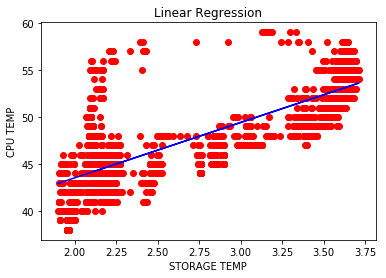

In [35]:
# Visualizing Linear Regression Results
plt.scatter(X1, Y, color = 'red')
plt.plot(X1, regressor.predict(X1), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('STORAGE TEMP')
plt.ylabel('CPU TEMP')
plt.show()

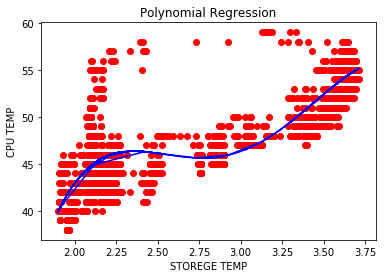

In [36]:
# Visualising the Polynomial Regression results
plt.scatter(X1, Y, color = 'red')
plt.plot(X1, regressor1.predict(polyreg.fit_transform(X1)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('STOREGE TEMP')
plt.ylabel('CPU TEMP')
plt.show()